In [1]:
import pandas as pd
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel("Online_Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:

import datetime as dt
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df = df[pd.notnull(df['CustomerID'])]
df = df[(df['Quantity']>0)]
df['Sales'] = df['Quantity'] * df['UnitPrice']
cols_of_interest = ['CustomerID', 'InvoiceDate', 'Sales']
df = df[cols_of_interest]

In [4]:
df.head()

,CustomerID,InvoiceDate,Sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


In [5]:
df = df.groupby(['CustomerID','InvoiceDate']).sum().reset_index()

In [6]:
df[df['CustomerID']==12346]

,CustomerID,InvoiceDate,Sales
0,12346.0,2011-01-18,77183.6


In [7]:
df[df['CustomerID']==14096.0]

,CustomerID,InvoiceDate,Sales
5078,14096.0,2011-08-30,21.84
5079,14096.0,2011-09-02,103.22
5080,14096.0,2011-09-09,119.62
5081,14096.0,2011-09-13,433.93
5082,14096.0,2011-09-21,4936.65
5083,14096.0,2011-09-26,3671.44
5084,14096.0,2011-10-03,2900.99
5085,14096.0,2011-10-10,3380.86
5086,14096.0,2011-10-17,4050.61
5087,14096.0,2011-10-24,3472.42


In [8]:
df['day_diff'] = (df['InvoiceDate'].max() - df['InvoiceDate']).dt.days

In [9]:
df_agg = df[['CustomerID', 'Sales', 'day_diff']].groupby(['CustomerID', 'day_diff']).sum().reset_index()
df_agg['Count'] = df[['CustomerID', 'Sales', 'day_diff']].groupby(['CustomerID', 'day_diff']).count().reset_index()['Sales']

In [10]:
df_agg.head()

,CustomerID,day_diff,Sales,Count
0,12346.0,325,77183.60,1
1,12347.0,2,224.82,1
2,12347.0,39,1294.32,1
3,12347.0,129,584.91,1
4,12347.0,183,382.52,1


In [11]:
df_agg.dtypes

CustomerID    float64
day_diff        int64
Sales         float64
Count           int64
dtype: object

In [12]:
from datetime import datetime, timedelta
cut_bins = []
cut_labels = []
for i in range(10):
    cut_bins.append(i*30)
    if i < 9:
        cut_labels.append("d-"+str(i*30))
    
print(cut_bins)
print(cut_labels)

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]
['d-0', 'd-30', 'd-60', 'd-90', 'd-120', 'd-150', 'd-180', 'd-210', 'd-240']


In [13]:
df_agg['day_bin_label'] = pd.cut(df_agg['day_diff'],bins=cut_bins, labels=cut_labels)

In [14]:
df_agg.head()

,CustomerID,day_diff,Sales,Count,day_bin_label
0,12346.0,325,77183.60,1,NaN
1,12347.0,2,224.82,1,d-0
2,12347.0,39,1294.32,1,d-30
3,12347.0,129,584.91,1,d-120
4,12347.0,183,382.52,1,d-180


In [15]:
df_agg = df_agg.dropna()

In [16]:
df_agg_2 = df_agg[['CustomerID','Sales', 'Count', 'day_bin_label']].groupby(['CustomerID', 'day_bin_label']).sum().reset_index()

In [17]:
df_agg_2.head()

,CustomerID,day_bin_label,Sales,Count
0,12347.0,d-0,224.82,1.0
1,12347.0,d-30,1294.32,1.0
2,12347.0,d-60,NaN,NaN
3,12347.0,d-90,NaN,NaN
4,12347.0,d-120,584.91,1.0


In [18]:
df_agg_2.dtypes

CustomerID        float64
day_bin_label    category
Sales             float64
Count             float64
dtype: object

In [19]:
pd.unique(df_agg_2['day_bin_label'])

[d-0, d-30, d-60, d-90, d-120, d-150, d-180, d-210, d-240]
Categories (9, object): [d-0 < d-30 < d-60 < d-90 ... d-150 < d-180 < d-210 < d-240]

In [20]:
df_agg_2['Sales'] = df_agg_2['Sales'].fillna(0)
df_agg_2['Count'] = df_agg_2['Count'].fillna(0)

In [21]:
df_agg_2.head()

,CustomerID,day_bin_label,Sales,Count
0,12347.0,d-0,224.82,1.0
1,12347.0,d-30,1294.32,1.0
2,12347.0,d-60,0.00,0.0
3,12347.0,d-90,0.00,0.0
4,12347.0,d-120,584.91,1.0


In [22]:
df_agg_2.sort_values('Count',ascending=False)

,CustomerID,day_bin_label,Sales,Count
15426,14911.0,d-0,26892.70,23.0
2619,12748.0,d-0,10221.96,17.0
15434,14911.0,d-240,10101.77,14.0
32985,17841.0,d-0,7939.33,14.0
15428,14911.0,d-60,15056.78,13.0
...,...,...,...,...
13936,14664.0,d-120,0.00,0.0
13935,14664.0,d-90,0.00,0.0
13934,14664.0,d-60,0.00,0.0
13931,14662.0,d-240,0.00,0.0


In [25]:
d_0 = df_agg_2[df_agg_2['day_bin_label'] == 'd-0']

In [26]:
d_60 = df_agg_2[df_agg_2['day_bin_label'] == 'd-60']

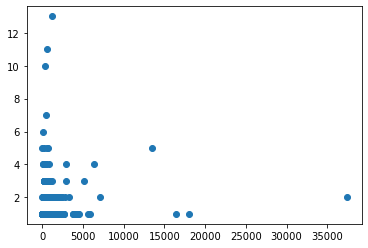

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(d_60['Sales']/d_60['Count'], d_60['Count'])

In [28]:
d_0.head()

,CustomerID,day_bin_label,Sales,Count
0,12347.0,d-0,224.82,1.0
9,12348.0,d-0,0.00,0.0
18,12349.0,d-0,1757.55,1.0
27,12352.0,d-0,0.00,0.0
36,12353.0,d-0,0.00,0.0


In [29]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize, RobustScaler
import numpy as np
#X = normalize(d_0[['Sales','Count']])
transformer = RobustScaler().fit(d_0[['Sales', 'Count']])
X = transformer.transform(d_0[['Sales', 'Count']])
knn = KMeans(n_clusters=8).fit(X)
dbscan = DBSCAN(eps=0.3).fit(X)

In [30]:
d_0['db_label'] = dbscan.fit_predict(X)
d_0['knn_label'] = knn.fit_predict(X)


In [31]:
d_0.groupby(['db_label']).count()

,CustomerID,day_bin_label,Sales,Count,knn_label
db_label,,,,,
-1,98,98,98,98,98
0,1158,1158,1158,1158,1158
1,2294,2294,2294,2294,2294
2,10,10,10,10,10
3,89,89,89,89,89
4,289,289,289,289,289
5,7,7,7,7,7
6,8,8,8,8,8


In [32]:
d_0.groupby(['knn_label']).count()

,CustomerID,day_bin_label,Sales,Count,db_label
knn_label,,,,,
0,2294,2294,2294,2294,2294
1,3,3,3,3,3
2,21,21,21,21,21
3,371,371,371,371,371
4,2,2,2,2,2
5,77,77,77,77,77
6,1180,1180,1180,1180,1180
7,5,5,5,5,5


In [33]:
X

array([[0.72879927, 1.        ],
       [0.        , 0.        ],
       [5.69745202, 1.        ],
       ...,
       [0.25233402, 1.        ],
       [2.78643672, 4.        ],
       [0.        , 0.        ]])

In [34]:
d_0['avg_amt_per_visit'] = d_0['Sales'] / d_0['Count']
d_0['avg_amt_per_visit'] = d_0['avg_amt_per_visit'].fillna(0)
d_0.head()

,CustomerID,day_bin_label,Sales,Count,db_label,knn_label,avg_amt_per_visit
0,12347.0,d-0,224.82,1.0,0,6,224.82
9,12348.0,d-0,0.00,0.0,1,0,0.00
18,12349.0,d-0,1757.55,1.0,2,3,1757.55
27,12352.0,d-0,0.00,0.0,1,0,0.00
36,12353.0,d-0,0.00,0.0,1,0,0.00


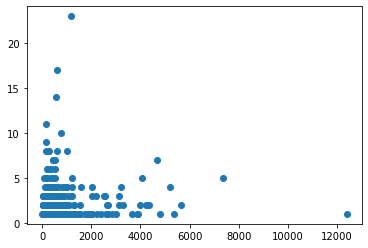

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(d_0['Sales']/d_0['Count'], d_0['Count'],label=pd.unique(d_0['knn_label']))

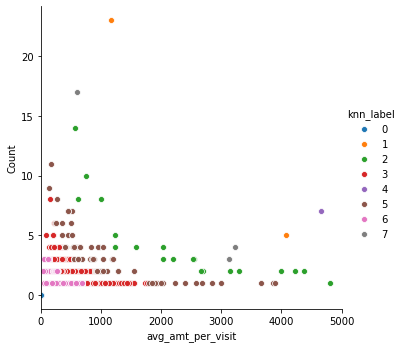

In [36]:
import seaborn as sns

g = sns.pairplot(x_vars=['avg_amt_per_visit'], y_vars=['Count'], data=d_0, hue="knn_label", size=5)
g.set(xlim=(0,5000))


In [39]:
d_0.head()

,CustomerID,day_bin_label,Sales,Count,db_label,knn_label,avg_amt_per_visit
0,12347.0,d-0,224.82,1.0,0,6,224.82
9,12348.0,d-0,0.00,0.0,1,0,0.00
18,12349.0,d-0,1757.55,1.0,2,3,1757.55
27,12352.0,d-0,0.00,0.0,1,0,0.00
36,12353.0,d-0,0.00,0.0,1,0,0.00


In [46]:
test = d_0[['knn_label','avg_amt_per_visit', 'Count', 'Sales']].groupby(['knn_label']).mean()
test.head(10)

,avg_amt_per_visit,Count,Sales
knn_label,,,
0,0.000000,0.000000,0.000000
1,3489.012942,10.666667,22718.756667
2,2514.796476,4.047619,6696.623810
3,564.633863,2.045822,927.493693
4,6006.127429,6.000000,34690.140000
5,1113.879541,3.220779,2367.990779
6,267.174605,1.121186,288.339178
7,4997.547686,5.400000,11233.000000
